In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../../../ao3_data/lda_merged_chs_20211216_no_crossover/')

In [3]:
# count number of .tsv files in directory
count = 0
for file in os.listdir():
    if file.endswith(".tsv"):
        count += 1
print(count)

22


In [4]:
def remove_0_and_nan_values(df, novelty):
    # remove 0 and  nan values
    df.dropna(subset=[novelty, 'Kudos', 'Hits'],inplace=True)
    df = df[df[novelty] != 0]
    df = df[df['Kudos'] != 0]
    df = df[df['Hits'] != 0]
    return df

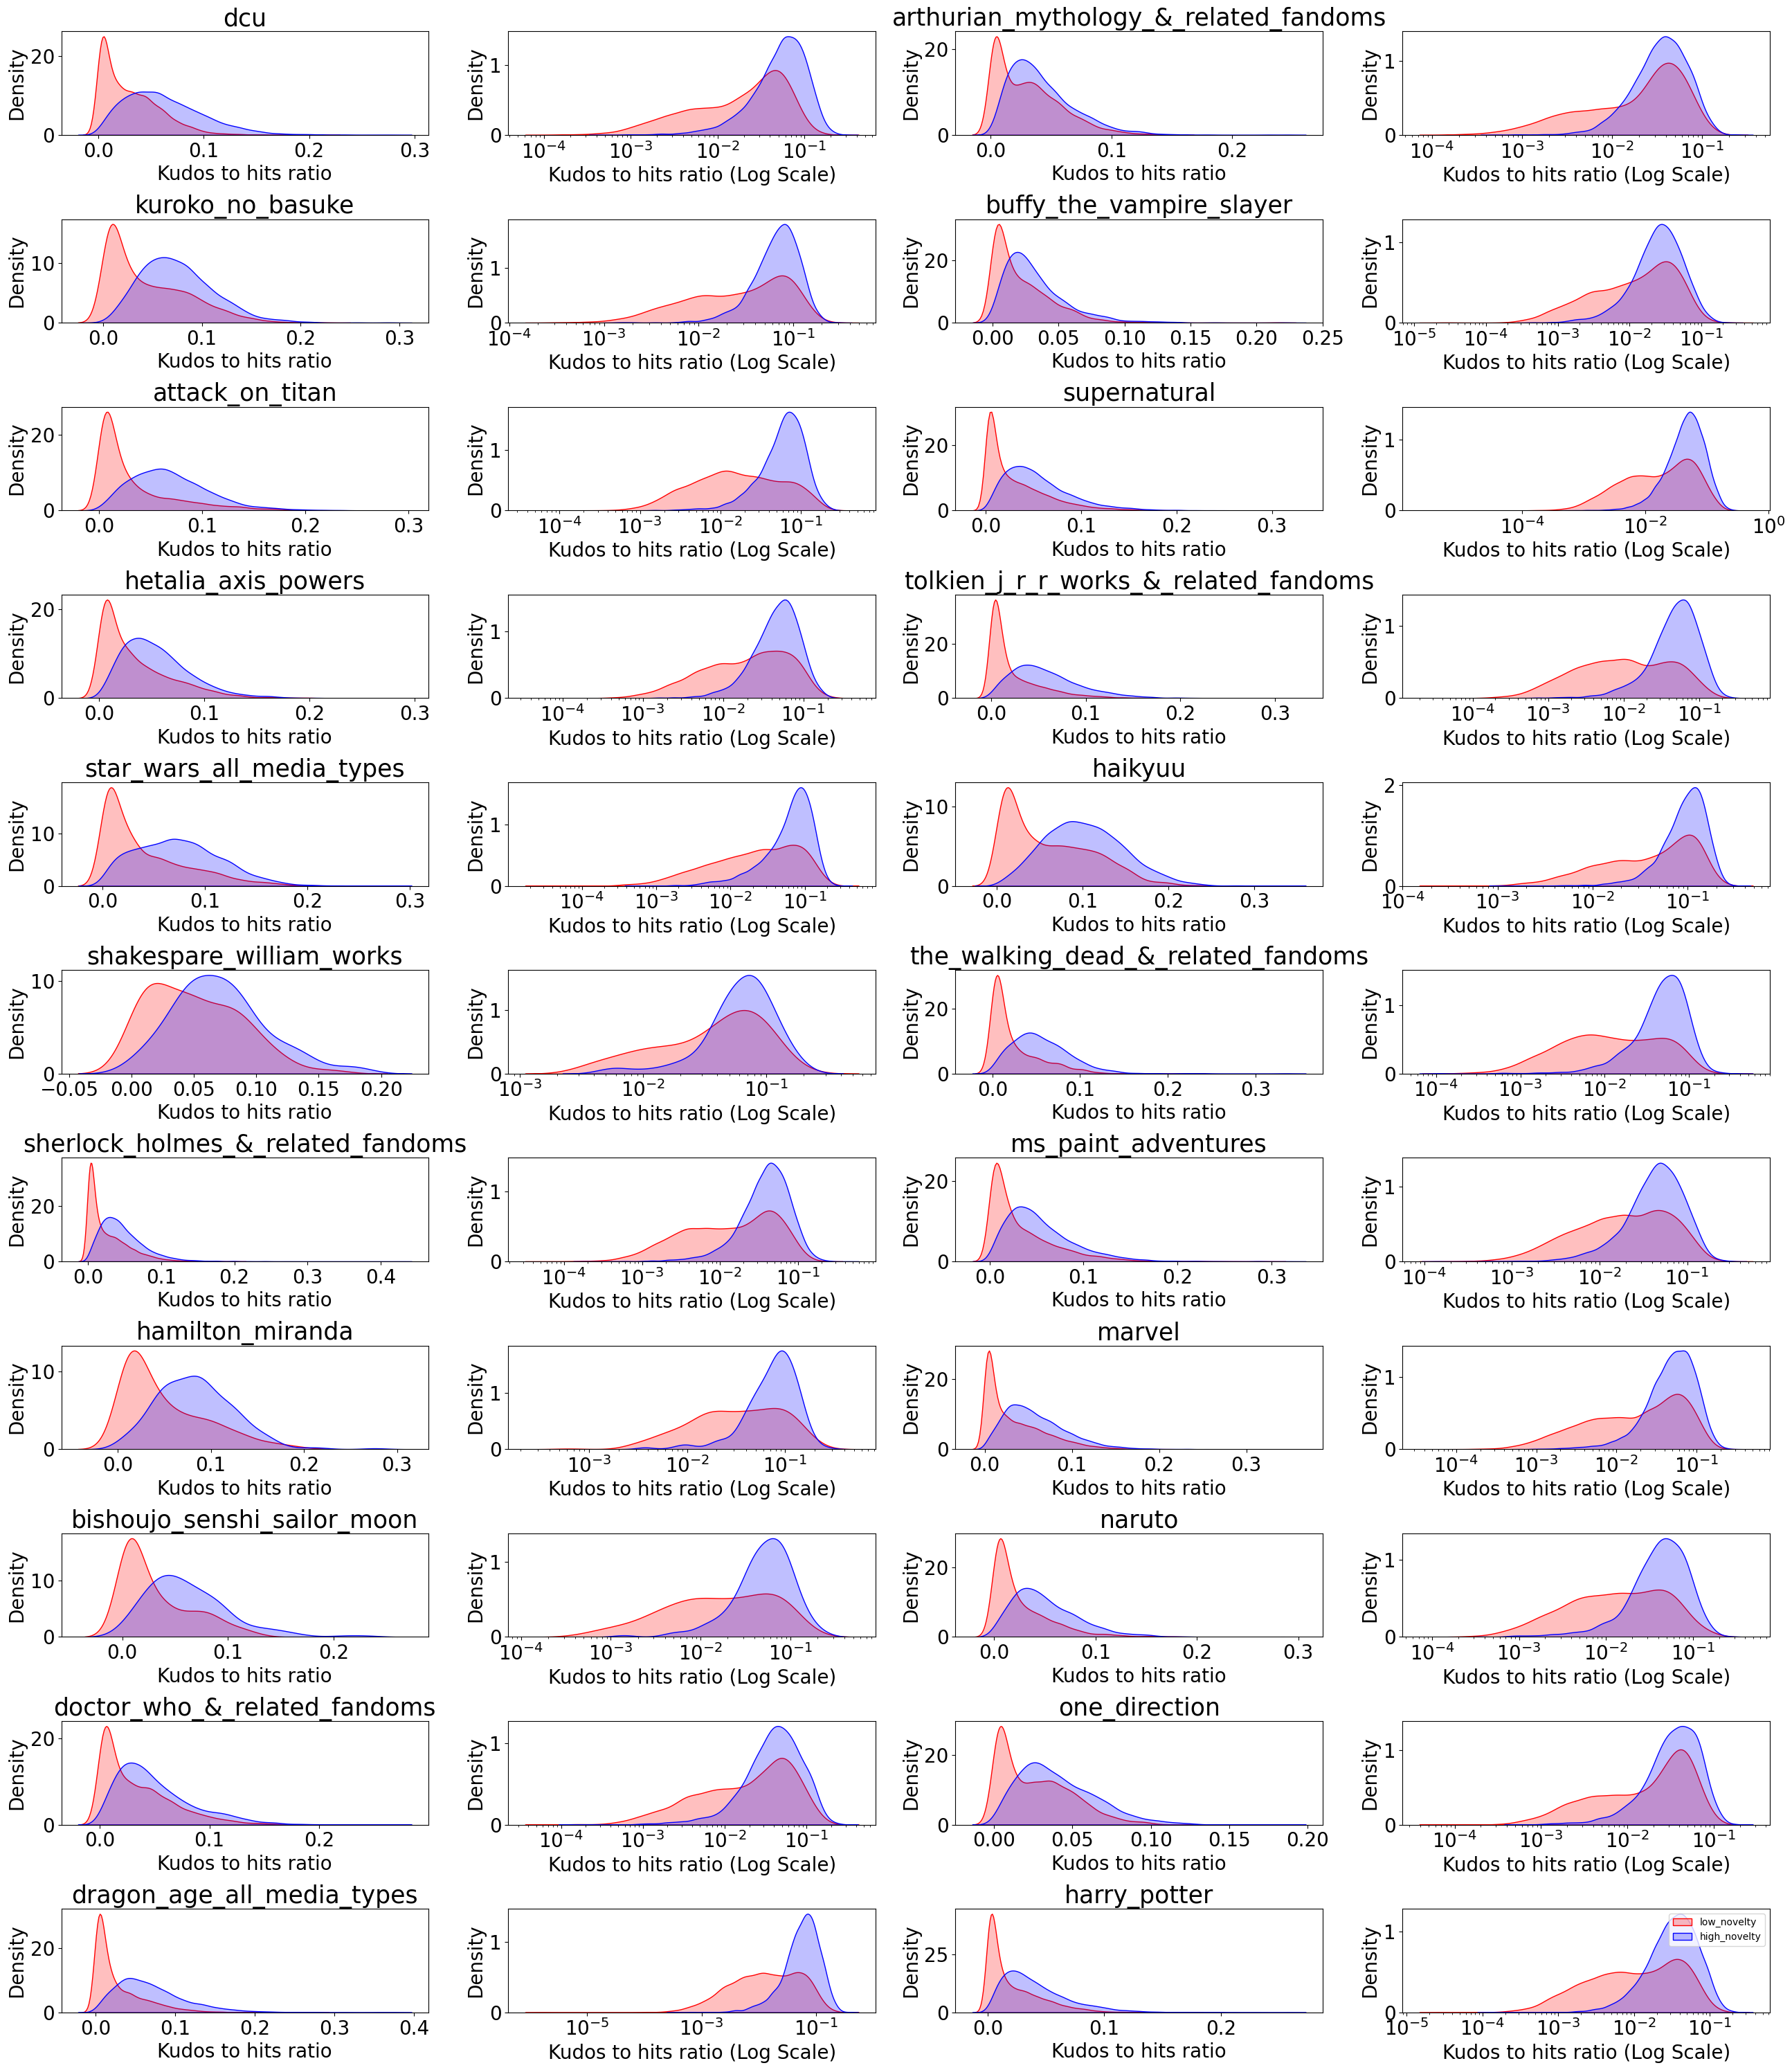

In [5]:
all_lda_df = None

# create a figure large enough for 44 subplots
fig, ax = plt.subplots(11, 4, figsize=(26, 30))
row_count = 0
curr = 1
col = 0

# loop through every file in current directory
for file in os.listdir():
    if file.endswith('.tsv'):
        fandom_name = file.replace('_lda_with_dist_merged_chs_no_crossover_20211216.tsv', '')
        lda_df = pd.read_csv(file, sep='\t')
        lda_df = remove_0_and_nan_values(lda_df, 'JSD')
        # sort by JSD values
        lda_df = lda_df.sort_values(by='JSD')
        
        # loop over all rows in lda_df, add a
        # column for Kudos/Hits ratio
        for index, row in lda_df.iterrows():
            lda_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
            
        # assign low to bottom 25% and high to top 25%
        low = lda_df.iloc[:int(len(lda_df)/4)]
        high = lda_df.iloc[int(len(lda_df)*3/4):]
        
        # plot the KDEs within the subplot
        sns.kdeplot(low['kudos_hits_ratio'], ax=ax[row_count,col], color='red', shade=True, label='low_novelty')
        sns.kdeplot(high['kudos_hits_ratio'], ax=ax[row_count,col], color='blue', shade=True, label='high_novelty')
        # ax[row_count,0].set_title(fandom_name)
        
        ax[row_count,col].set_xlabel('Kudos to hits ratio', fontsize=20)
        ax[row_count,col].set_ylabel('Density', fontsize=20)
        # change xtick label size
        ax[row_count,col].tick_params(axis='x', labelsize=20)
        ax[row_count,col].tick_params(axis='y', labelsize=20)

        sns.kdeplot(low['kudos_hits_ratio'], ax=ax[row_count,col+1], color='red', shade=True, label='low_novelty', log_scale=True)
        sns.kdeplot(high['kudos_hits_ratio'], ax=ax[row_count,col+1], color='blue', shade=True, label='high_novelty', log_scale=True)
        ax[row_count,col].set_title(fandom_name, fontsize=25)
        
        ax[row_count,col+1].set_xlabel('Kudos to hits ratio (Log Scale)', fontsize=20)
        ax[row_count,col+1].set_ylabel('Density', fontsize=20)
        # change xtick label size
        ax[row_count,col+1].tick_params(axis='x', labelsize=20)
        ax[row_count,col+1].tick_params(axis='y', labelsize=20)
        
        if curr % 2 == 0:
            row_count += 1
            col = 0
        else:
            col = 2
            
        curr += 1
        
plt.legend()
plt.tight_layout()
os.chdir('../../ao3/exps/20230203_kudos_to_hits_kdes')
plt.savefig('kudos_hits_ratio_kde_plot_topic_novelty_top_bottom_25p_each_fanfiction_category.pdf')